In [1]:
import pandas as pd
df_mcr = pd.read_csv('mcr-general-office-14-05-2020.csv')
df_mcr.head(3)

,REF.MCR,MARCA,CATEGORÍA,EAN,PART NUMBER,NOMBRE,PRECIO,CANON,PRECIO SIN CANON,STOCK,COMENTARIO
0,29601,Corsair,Accesorios de almacenamiento / Flash y discos ...,843591066402,CMFSS3B-256GB,MEMORIA FLASH SURVIVOR STEALTH USB 3.0 256GB C...,"59,93","0,24","59,69",0,BAJO PEDIDO SIN FIANZA
1,803583,Corsair,Accesorios de almacenamiento / Flash y discos ...,843591047289,CMFVY3A-128GB,MEMORIA FLASH VOYAGER V2 128 GB USB 3.0 CORSAIR,"26,10","0,24","25,86",0,BAJO PEDIDO SIN FIANZA
2,814813,Corsair,Accesorios de almacenamiento / Flash y discos ...,843591057004,CMFSL3X1-128GB,MEMORIA FLASH VOYAGER SLIDER X1 128 GB USB 3.0...,"26,10","0,24","25,86",0,BAJO PEDIDO SIN FIANZA


In [2]:
df_mcr.columns

Index(['REF.MCR', 'MARCA', 'CATEGORÍA', 'EAN', 'PART NUMBER', 'NOMBRE',
       'PRECIO', 'CANON', 'PRECIO SIN CANON', 'STOCK', 'COMENTARIO'],
      dtype='object')

In [3]:
df_mcr.columns = ['REF.MCR', 'Marca', 'CATEGORÍA', 'EAN', 'pnumber', 'NOMBRE',
       'PRECIO', 'CANON', 'PRECIO SIN CANON', 'STOCK', 'COMENTARIO']

In [8]:
import pandas as pd
df_amz = pd.read_csv('amz-scrapp-office.csv')

In [10]:
list(df_amz.columns)

['Badge',
 'Product',
 'Price',
 'ASIN',
 'Marca',
 'Modelo',
 'Número de productos',
 'Número de pieza del fabricante',
 'Clasificación en los más vendidos de Amazon',
 'sellers',
 'Link',
 'Color',
 'Link Proveedor',
 'Valoración media de los clientes',
 'Producto en Amazon.es desde',
 'Tipo de material',
 'Tipo de punta',
 'Color de la tinta',
 'Nivel de plomo del pincel (Dureza)',
 'Tamaño',
 'Punto tipográfico',
 'Tamaño de línea',
 'Identificador de producto del fabricante',
 'Peso del producto',
 'Dimensiones del producto',
 'Número de modelo del producto',
 'Características especiales',
 'Necesita baterías',
 'Peso',
 'Material de la cubierta',
 'Tipo de ruedecilla/superficie/rueda',
 'Número de modelo',
 'Dimensiones del paquete',
 'Edad mínima recomendada (por el fabricante)',
 'Montaje necesario',
 'Incluye baterías',
 '¿Mando a distancia incluido?',
 'Tipo de mando a distancia\n',
 'Número de canales de radiocontrol',
 'Número de canales',
 'Restricciones de envío',
 'Porce

In [16]:
df_amz= df_amz[['Badge',
 'Product',
 'Price',
 'ASIN',
 'Marca',
 'Modelo',
 'Número de productos',
 'Número de pieza del fabricante']]
df_amz.columns = ['Badge',
 'Product',
 'Price',
 'ASIN',
 'Marca',
 'Modelo',
 'Número de productos',
 'pnumber']
"""['level_0', 'Badge', 'Product', 'Price', 'link', 'Marca', 'Modelo',
       'Color', 'Número de productos', 'Tamaño',
       'pnumber', 'ASIN', 'sellers',
       'Valoración media de los clientes',
       'Clasificación en los más vendidos de Amazon',
       'Número de modelo del producto']"""

KeyError: "['Número de pieza del fabricante'] not in index"

In [17]:
df_amz.Price = df_amz.Price.str.replace("$","").astype(float)

In [18]:
pd.merge(df_mcr,df_amz,on=['Marca','pnumber'])[['Marca','Modelo','PRECIO','Price']]

,Marca,Modelo,PRECIO,Price
0,Oxford,100430166,"0,94",8.59
1,Oxford,400058179,"1,59",2.66
2,Oxford,400027271,"6,29",8.63
3,Fellowes,5306114,"5,90",6.49
4,Fellowes,5306114,"5,90",6.49
5,Faber-Castell,65021,"2,71",3.23
6,Faber-Castell,65021,"2,71",3.23
7,Faber-Castell,32722-8,"5,59",6.65
8,Maped,196100,"3,02",3.99
9,Alpino,AR001002,"1,06",1.50


In [20]:
inner_amz = []
inner_mcr = []
for ix,mcrp in df_mcr[df_mcr['pnumber'].notnull()].iterrows():
    for jx, amzp in df_amz[df_amz['Marca'].str.lower() == str(mcrp['Marca']).lower()].iterrows():         
        amz_model = str(amzp['Modelo']).lower()
        amz_prod = amzp['Product'].lower()
        mcr_prod = str(mcrp['NOMBRE']).lower()
        mcr_pnumber = mcrp['pnumber'].lower()
        
        
        if amzp['Price'] < 10 or mcrp['STOCK']=='0':
            continue
            
        if(mcr_pnumber in amz_prod or amz_model in mcr_pnumber):
            print('AMZ')
            print(amzp[['Marca','Product','Modelo','Price']])#''--'+)
            print('MCR')
            print(mcrp[['NOMBRE','PRECIO','STOCK']])
            print('----------------------')
        

AMZ
Marca                                              STAEDTLER
Product    Staedtler Design Journey 3200 Tb72. Rotuladore...
Modelo                                          3200 TB72 ST
Price                                                  25.25
Name: 68, dtype: object
MCR
NOMBRE    ESTUCHE DE PLÁSTICO CON 72 ROTULADORES, COLORE...
PRECIO                                                15,01
STOCK                                             HAY STOCK
Name: 2979, dtype: object
----------------------
AMZ
Marca                                                     HP
Product    HP 301 CH561EE Cartucho de Tinta Original, 1 u...
Modelo                                               CH561EE
Price                                                  17.87
Name: 252, dtype: object
MCR
NOMBRE    CARTUCHO DE TINTA NEGRO 301 HP
PRECIO                             11,45
STOCK                                101
Name: 3936, dtype: object
----------------------
AMZ
Marca                                     

AMZ
Marca                                                   DYMO
Product    Dymo LetraTag LT-100H - Impresora de etiquetas...
Modelo                                              S0884000
Price                                                  22.82
Name: 237, dtype: object
MCR
NOMBRE    ROTULADORA LETRATAG 100H DYMO
PRECIO                            19,85
STOCK                         HAY STOCK
Name: 5212, dtype: object
----------------------


In [26]:
amzl = list(df_amz['Product'].fillna("").str.lower())
mcrl = list(df_mcr['NOMBRE'].fillna("").str.lower())
documents = []
stop_words = ["cartucho",'de','original','impresora', 'y']
for d in amzl+mcrl:
    for sw in stop_words:
        d = d.replace(sw,' ')
        d = d.replace('\xa0',' ')
    documents.append(d)
documents[:3]

['canon 5226b005 -      tinta   color 541xl, 3 colores',
 'canon pg-510     tinta   negro para     in eccion   tinta pixma',
 'hp ch562ee 301     tinta  , 1 unidad, tricolor (cian, magenta, amarillo)']

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer().fit(documents)

In [28]:
amztf = tfidf.transform(amzl)
mcrtf = tfidf.transform(mcrl)
pairwise_similarity = amztf*mcrtf.T
pairwise_similarity.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

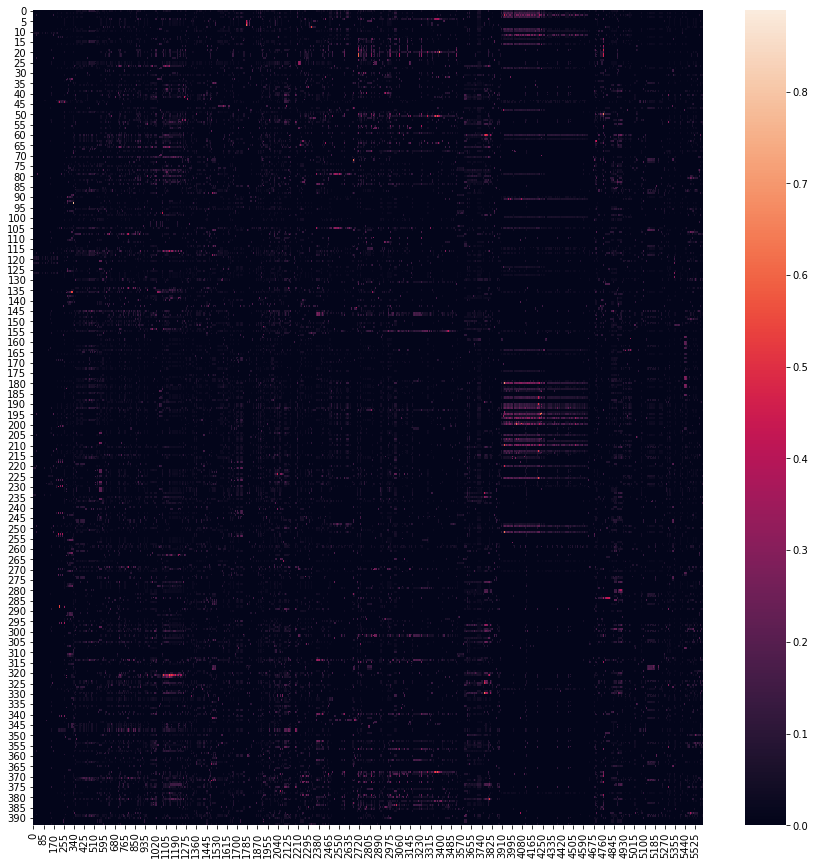

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(pairwise_similarity.toarray())

In [30]:
import numpy as np
ps = pairwise_similarity.toarray()
# Get max value index
ind = np.unravel_index(np.argmax(ps, axis=None), ps.shape)
ind

(69, 343)

In [32]:
ps[ind[0],ind[1]]

0.8889831712260943

In [35]:
print(amzl[ind[0]])
print(mcrl[ind[1]])

mr. wonderful planificador para sobrevivir a las opos-lo voy a conseguir, multicolor, 0
planificador para sobrevivir a las opos doble espiral "lo voy a conseguir" mr.wonderful


In [42]:
amz_price_limit = 10
amzis,mcris = np.where(ps > 0.2)
excluded_words = ['tinta']#['hp','moleskine','epson','fellowes','wonderful']
prev_amzi = None


for amzi,mcri in zip(amzis,mcris):
    ramz = df_amz.iloc[amzi]
    rmcr = df_mcr.iloc[mcri]
    if ramz.Marca != rmcr.Marca:
        continue
    exclude_iteration = False
    for ew in excluded_words:
        if ew in amzl[amzi]:
            exclude_iteration = True
            break
    if exclude_iteration or ramz.Price < amz_price_limit:
        continue
    
    if rmcr.STOCK != '0':
        if prev_amzi != amzi:
            prev_amzi = amzi
            print("\n")
            print("----")
            print('AMZ: '+ amzl[amzi] + " >>> " + str(ramz.Price))
            print("Similar to this product:")
        print("\tMCR: "+str(rmcr['EAN'])+'--'+mcrl[mcri] + " >>> $" + str(rmcr.PRECIO) + " >>> stock:"+rmcr.STOCK)
    



----
AMZ: marcador stabilo boss original - set de mesa con 9 colores fluorescentes y 6 colores pastel >>> 14.0
Similar to this product:
	MCR: 4006381507882--estuche rotuladores punta fibra media 1mm. pen 8 unidades colores pastel stabilo >>> $4,55 >>> stock:HAY STOCK
	MCR: 4006381493499--estuche rotulador punta fina 0,4mm. point 88 con 8 unidades pastel stabilo >>> $3,18 >>> stock:HAY STOCK
	MCR: 4006381217842--estuche rotulador punta fina 0,4mm. point 88 con 10 unidades colores surtidos stabilo >>> $4,16 >>> stock:HAY STOCK
	MCR: 4006381333627--marcador fluorescente boss original trazo 2/5mm. amarillo stabilo >>> $0,56 >>> stock:HAY STOCK
	MCR: 4006381333634--marcador fluorescente boss original trazo 2/5mm. azul stabilo >>> $0,56 >>> stock:HAY STOCK
	MCR: 4006381333641--marcador fluorescente boss original trazo 2/5mm. verde stabilo >>> $0,56 >>> stock:HAY STOCK
	MCR: 4006381333658--marcador fluorescente boss original trazo 2/5mm. rojo stabilo >>> $0,56 >>> stock:HAY STOCK
	MCR: 4006



----
AMZ: finocam 741106020 espiral year- agenda 2020,  70gr/m2, negro, 155 x 212 mm >>> 16.79
Similar to this product:
	MCR: 8422952017530--agenda organizador open club 1000 negro castellano finocam >>> $35,48 >>> stock:HAY STOCK
	MCR: 8422952017516--agenda organizador open club 500 negro castellano finocam >>> $30,85 >>> stock:HAY STOCK
	MCR: 8422952187974--agenda espiral opaque e10 semana vista 2020 negro+ finocam >>> $4,37 >>> stock:HAY STOCK
	MCR: 8422952187981--agenda espiral opaque e10 semana vista 2020 azul+ finocam >>> $4,37 >>> stock:HAY STOCK


----
AMZ: alpino dp000915  - plastilina, 24 unidades >>> 11.98
Similar to this product:
	MCR: 8413240565130--estuche carton 24 unidades lapices hexagonales alta calidad 3mm. colores surtidos alpino >>> $2,61 >>> stock:HAY STOCK
	MCR: 8413240556749--estuche 12 unidades rotuladores punta fina colores surtidos alpino >>> $1,06 >>> stock:HAY STOCK
	MCR: 8413240449379--estuche 24 unidades rotuladores punta gruesa colores surtidos alpino 

In [124]:
docs(2,3968)

'HP'